In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import time

%matplotlib inline
sns.set(rc = {"figure.figsize" : (8, 6)})

In [13]:
data = pd.read_csv("D:\Rubix\ml_models\data\wind_turbine_data.csv")
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [13]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


In [14]:
data.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


In [15]:
data.isnull().sum()

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

C:\Users\Administrator\AppData\Local\Temp\ipykernel_20104\2780765753.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


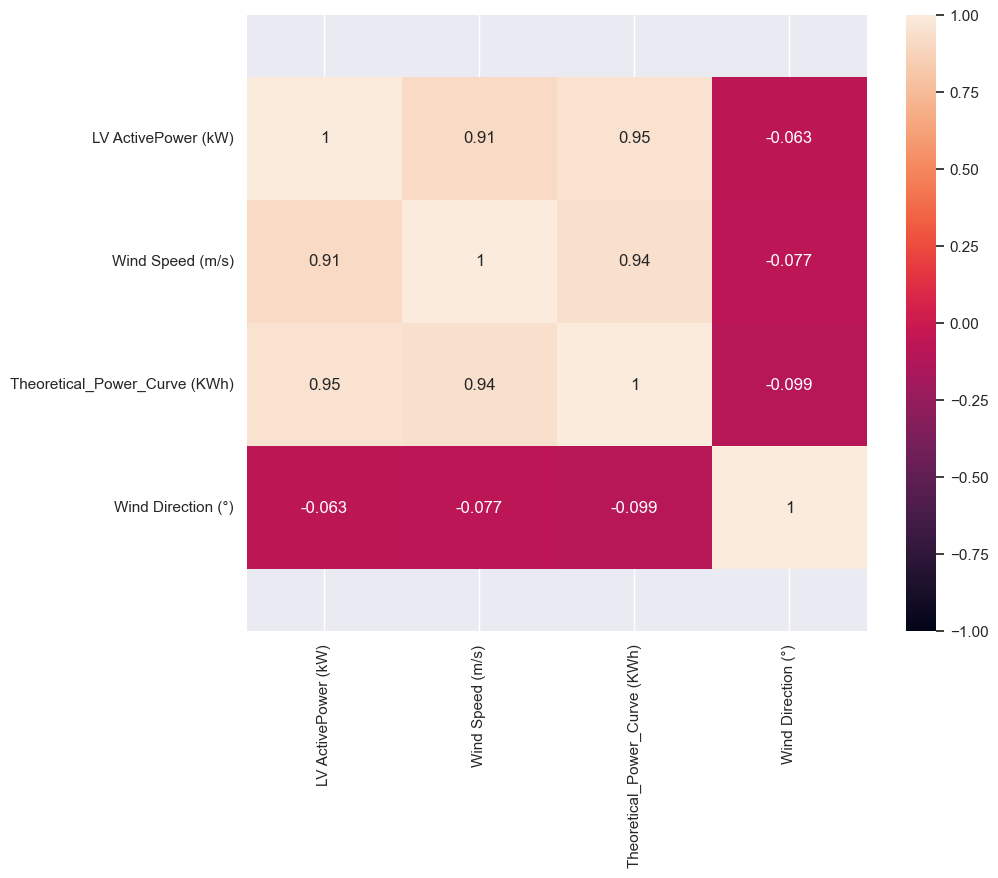

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
LV ActivePower (kW),1.000000,0.912774,0.949918,-0.062702
Wind Speed (m/s),0.912774,1.000000,0.944209,-0.077188
Theoretical_Power_Curve (KWh),0.949918,0.944209,1.000000,-0.099076
Wind Direction (°),-0.062702,-0.077188,-0.099076,1.000000


In [16]:
corr = data.corr()
plt.figure(figsize=(10, 8))

ax = sns.heatmap(corr, vmin = -1, vmax = 1, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()
corr

In [8]:
!pip install windrose


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


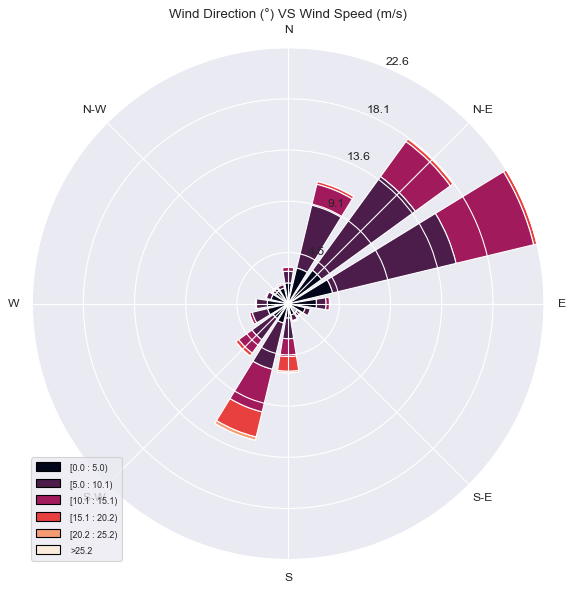

In [17]:
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(data['Wind Direction (°)'], data['Wind Speed (m/s)'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title("Wind Direction (°) VS Wind Speed (m/s)")
plt.show()

In [14]:
data['Year']=data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[0])
data['Month']=data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[1])
data['Day']=data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[2])
data['Time_Hours']=data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[3])
data['Time_Minutes']=data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[4])
data.head(10)

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Year,Month,Day,Time_Hours,Time_Minutes
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,2018,1,1,0,0
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,2018,1,1,0,10
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,2018,1,1,0,20
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,2018,1,1,0,30
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,2018,1,1,0,40
5,01 01 2018 00:50,402.391998,5.604052,499.436385,264.578613,2018,1,1,0,50
6,01 01 2018 01:00,447.605713,5.793008,557.372363,266.163605,2018,1,1,1,0
7,01 01 2018 01:10,387.242188,5.306050,414.898179,257.949493,2018,1,1,1,10
8,01 01 2018 01:20,463.651215,5.584629,493.677652,253.480698,2018,1,1,1,20
9,01 01 2018 01:30,439.725708,5.523228,475.706783,258.723785,2018,1,1,1,30


C:\Users\Administrator\AppData\Local\Temp\ipykernel_20104\1239325476.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.iloc[:,i+1], shade=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_20104\1239325476.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.iloc[:,i+1], shade=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_20104\1239325476.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.iloc[:,i+1], shade=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_20104\1239325476.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become

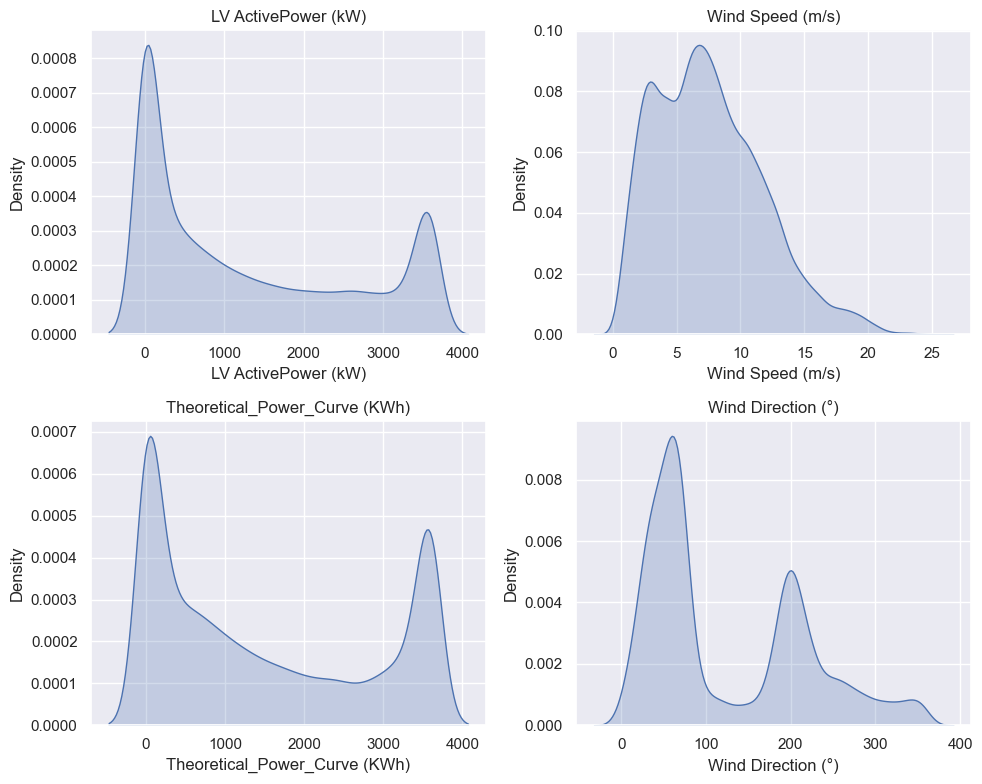

In [19]:
plt.figure(figsize=(10, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(data.iloc[:,i+1], shade=True)
    plt.title(data.columns[i+1])
plt.tight_layout()
plt.show()

In [15]:
data = data.dropna()

In [16]:
data["Date/Time"] = pd.to_datetime(data["Date/Time"], format = "%d %m %Y %H:%M", errors = "coerce")
data

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Year,Month,Day,Time_Hours,Time_Minutes
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,2018,1,1,0,0
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,2018,1,1,0,10
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,2018,1,1,0,20
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,2018,1,1,0,30
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,2018,1,1,0,40
...,...,...,...,...,...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724,2018,12,31,23,10
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599,2018,12,31,23,20
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500,2018,12,31,23,30
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,84.297913,2018,12,31,23,40


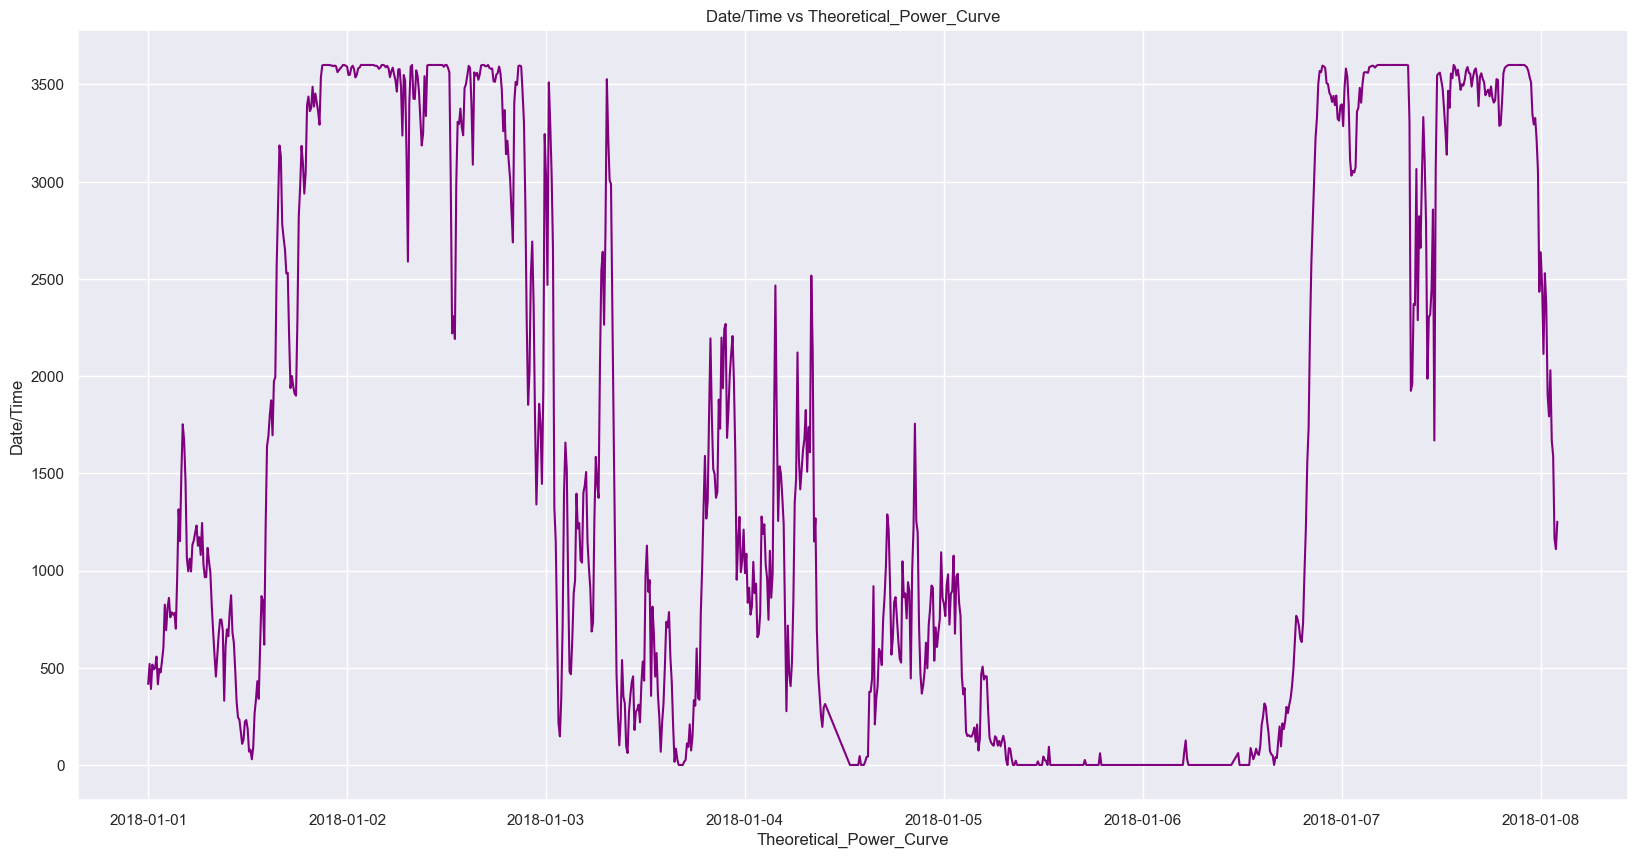

In [22]:
fig, ax = plt.subplots(figsize=(20,10))

# Add x-axis and y-axis
ax.plot(data['Date/Time'][0:1000],
        data['Theoretical_Power_Curve (KWh)'][0:1000],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Theoretical_Power_Curve",
       ylabel="Date/Time",
       title="Date/Time vs Theoretical_Power_Curve")

plt.show()

In [17]:
cols = ["Wind Direction (°)", 'Year', 'Month', "Day", "Time_Hours", "Time_Minutes" ]
data = data.drop(cols, axis=1)
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972


In [18]:
df = data.copy()
df

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972
...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503


In [19]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from datetime import datetime 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy as np
import pandas as pd

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8952\3762785440.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [20]:
df = df.set_index('Date/Time')

In [25]:
batch_size_exp = 1
epoch_exp = 15
neurons_exp = 10
predict_values_exp = 1000
lag_exp=24

In [5]:
def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

In [6]:
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

In [7]:
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [8]:
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled

In [9]:
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = np.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

In [10]:
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
        model.reset_states()
    return model
    print(model.summary)

In [11]:
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    #print(X)
    yhat = model.predict(X, batch_size=1)
    return yhat[0,0]

In [21]:
del df['LV ActivePower (kW)']
del df['Wind Speed (m/s)']
df.head()

,Theoretical_Power_Curve (KWh)
Date/Time,
2018-01-01 00:00:00,416.328908
2018-01-01 00:10:00,519.917511
2018-01-01 00:20:00,390.900016
2018-01-01 00:30:00,516.127569
2018-01-01 00:40:00,491.702972


In [22]:
for i in range(0,10):
  df = df[:-1]
df.tail()

,Theoretical_Power_Curve (KWh)
Date/Time,
2018-12-31 21:30:00,1811.263260
2018-12-31 21:40:00,1787.100338
2018-12-31 21:50:00,2777.504103
2018-12-31 22:00:00,3025.199012
2018-12-31 22:10:00,3161.693967


In [23]:
raw_values = df.values
diff_values = difference(raw_values, 1)

In [26]:
supervised = timeseries_to_supervised(diff_values, lag_exp)
supervised_values = supervised.values

In [34]:
train, test = supervised_values[0:-predict_values_exp], supervised_values[-predict_values_exp:]
test[15]

array([array([-423.2593804]), array([-566.1798888]),
       array([562.46448497]), array([-810.85708998]),
       array([-157.65084898]), array([113.35929122]),
       array([1646.73675932]), array([-589.85859243]),
       array([958.31851659]), array([-825.59872405]),
       array([-551.82999901]), array([-1093.88705178]), array([0.]),
       array([0.]), array([0.]), array([0.]), array([0.]), array([0.]),
       array([0.]), array([0.]), array([0.]), array([0.]), array([0.]),
       array([0.]), array([504.87084591])], dtype=object)

In [33]:
scaler, train_scaled, test_scaled = scale(train, test)

test_scaled[15, 0:-1]

array([-0.11757205, -0.15727219,  0.15624013, -0.22523808, -0.0437919 ,
        0.03148869,  0.45742688, -0.16384961,  0.26619959, -0.22933298,
       -0.15328611, -0.30385751,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ])

In [42]:
lstm_model = fit_lstm(train_scaled, batch_size_exp, epoch_exp, neurons_exp)

49519/49519 [==============================] - 57s 1ms/step - loss: 0.0055


In [43]:
predictions = list()
expectations = list()
predictions_plot = list()
expectations_plot = list()
test_pred = list()
for i in range(len(test_scaled)):
    # make one-step forecast
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    yhat = forecast_lstm(lstm_model, 1, X)#batch_size_exp to 1
    '''# Start Debug prints
    print("X: %", X)
    print("yhat: %", yhat)
    # End Debug prints'''
    # Replacing value in test scaled with the predicted value.
    test_pred = [yhat] + test_pred 
    if len(test_pred) > lag_exp+1:
        test_pred = test_pred[:-1]
    if i+1<len(test_scaled):
        if i+1 > lag_exp+1:
            test_scaled[i+1] = test_pred
        else:
            test_scaled[i+1] = np.concatenate((test_pred, test_scaled[i+1, i+1:]),axis=0)

    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    # invert differencing
    yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
    # store forecast
    expected = raw_values[len(train) + i + 1]
    predictions_plot.append(yhat)
    expectations_plot.append(expected)
    if expected != 0:
        predictions.append(yhat)
        expectations.append(expected)
    print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

1/1 [==============================] - 1s 550ms/step
Hour=1, Predicted=3612.495530, Expected=3600.000000
1/1 [==============================] - 0s 15ms/step
Hour=2, Predicted=3609.291580, Expected=3600.000000
1/1 [==============================] - 0s 15ms/step
Hour=3, Predicted=3607.841393, Expected=3600.000000
1/1 [==============================] - 0s 14ms/step
Hour=4, Predicted=3607.208866, Expected=2506.112948
1/1 [==============================] - 0s 15ms/step
Hour=5, Predicted=2512.999631, Expected=1954.282949
1/1 [==============================] - 0s 14ms/step
Hour=6, Predicted=1961.166404, Expected=1128.684225
1/1 [==============================] - 0s 15ms/step
Hour=7, Predicted=1135.263996, Expected=2087.002742
1/1 [==============================] - 0s 14ms/step
Hour=8, Predicted=2093.596865, Expected=1497.144149
1/1 [==============================] - 0s 15ms/step
Hour=9, Predicted=1503.332223, Expected=3143.880909
1/1 [==============================] - 0s 14ms/step
Hour=10, Pr

1/1 [==============================] - 0s 27ms/step
Hour=79, Predicted=1272.219326, Expected=1349.485359
1/1 [==============================] - 0s 13ms/step
Hour=80, Predicted=1355.160320, Expected=1979.156533
1/1 [==============================] - 0s 13ms/step
Hour=81, Predicted=1984.831506, Expected=2697.981442
1/1 [==============================] - 0s 23ms/step
Hour=82, Predicted=2703.656415, Expected=3263.367927
1/1 [==============================] - 0s 15ms/step
Hour=83, Predicted=3269.042905, Expected=3146.717940
1/1 [==============================] - 0s 13ms/step
Hour=84, Predicted=3152.392909, Expected=3018.130808
1/1 [==============================] - 0s 13ms/step
Hour=85, Predicted=3023.805769, Expected=3300.665177
1/1 [==============================] - 0s 14ms/step
Hour=86, Predicted=3306.340127, Expected=2747.927256
1/1 [==============================] - 0s 12ms/step
Hour=87, Predicted=2753.602202, Expected=2590.529143
1/1 [==============================] - 0s 16ms/step
Hou

1/1 [==============================] - 0s 14ms/step
Hour=157, Predicted=2442.179007, Expected=1829.369330
1/1 [==============================] - 0s 29ms/step
Hour=158, Predicted=1835.044185, Expected=2808.873842
1/1 [==============================] - 0s 15ms/step
Hour=159, Predicted=2814.548698, Expected=2443.197451
1/1 [==============================] - 0s 16ms/step
Hour=160, Predicted=2448.872306, Expected=1807.169085
1/1 [==============================] - 0s 16ms/step
Hour=161, Predicted=1812.843940, Expected=3128.215862
1/1 [==============================] - 0s 15ms/step
Hour=162, Predicted=3133.890717, Expected=2663.481637
1/1 [==============================] - 0s 14ms/step
Hour=163, Predicted=2669.156492, Expected=3013.534684
1/1 [==============================] - 0s 14ms/step
Hour=164, Predicted=3019.209538, Expected=2699.478367
1/1 [==============================] - 0s 25ms/step
Hour=165, Predicted=2705.153222, Expected=2512.232043
1/1 [==============================] - 0s 13ms

1/1 [==============================] - 0s 17ms/step
Hour=235, Predicted=724.737314, Expected=490.146742
1/1 [==============================] - 0s 16ms/step
Hour=236, Predicted=495.821597, Expected=274.252958
1/1 [==============================] - 0s 13ms/step
Hour=237, Predicted=279.927813, Expected=194.784678
1/1 [==============================] - 0s 15ms/step
Hour=238, Predicted=200.459533, Expected=403.764000
1/1 [==============================] - 0s 15ms/step
Hour=239, Predicted=409.438855, Expected=126.788167
1/1 [==============================] - 0s 16ms/step
Hour=240, Predicted=132.463022, Expected=126.351038
1/1 [==============================] - 0s 22ms/step
Hour=241, Predicted=132.025893, Expected=124.229530
1/1 [==============================] - 0s 22ms/step
Hour=242, Predicted=129.904385, Expected=126.556187
1/1 [==============================] - 0s 15ms/step
Hour=243, Predicted=132.231042, Expected=177.237514
1/1 [==============================] - 0s 12ms/step
Hour=244, Pr

1/1 [==============================] - 0s 14ms/step
Hour=315, Predicted=5.674855, Expected=0.000000
1/1 [==============================] - 0s 14ms/step
Hour=316, Predicted=5.674855, Expected=0.000000
1/1 [==============================] - 0s 14ms/step
Hour=317, Predicted=5.674855, Expected=0.000000
1/1 [==============================] - 0s 14ms/step
Hour=318, Predicted=5.674855, Expected=56.056234
1/1 [==============================] - 0s 14ms/step
Hour=319, Predicted=61.731090, Expected=47.921508
1/1 [==============================] - 0s 15ms/step
Hour=320, Predicted=53.596363, Expected=80.975877
1/1 [==============================] - 0s 15ms/step
Hour=321, Predicted=86.650733, Expected=227.808563
1/1 [==============================] - 0s 15ms/step
Hour=322, Predicted=233.483419, Expected=216.293668
1/1 [==============================] - 0s 15ms/step
Hour=323, Predicted=221.968523, Expected=99.450182
1/1 [==============================] - 0s 15ms/step
Hour=324, Predicted=105.125037, E

1/1 [==============================] - 0s 15ms/step
Hour=395, Predicted=149.345524, Expected=187.244605
1/1 [==============================] - 0s 14ms/step
Hour=396, Predicted=192.919460, Expected=64.917083
1/1 [==============================] - 0s 15ms/step
Hour=397, Predicted=70.591938, Expected=187.870575
1/1 [==============================] - 0s 14ms/step
Hour=398, Predicted=193.545431, Expected=201.007355
1/1 [==============================] - 0s 15ms/step
Hour=399, Predicted=206.682210, Expected=184.030788
1/1 [==============================] - 0s 14ms/step
Hour=400, Predicted=189.705643, Expected=79.627599
1/1 [==============================] - 0s 15ms/step
Hour=401, Predicted=85.302454, Expected=123.053612
1/1 [==============================] - 0s 15ms/step
Hour=402, Predicted=128.728467, Expected=117.692995
1/1 [==============================] - 0s 15ms/step
Hour=403, Predicted=123.367850, Expected=25.324509
1/1 [==============================] - 0s 14ms/step
Hour=404, Predict

1/1 [==============================] - 0s 15ms/step
Hour=476, Predicted=126.538243, Expected=84.183055
1/1 [==============================] - 0s 14ms/step
Hour=477, Predicted=89.857910, Expected=34.667256
1/1 [==============================] - 0s 14ms/step
Hour=478, Predicted=40.342111, Expected=19.277590
1/1 [==============================] - 0s 24ms/step
Hour=479, Predicted=24.952445, Expected=66.324557
1/1 [==============================] - 0s 24ms/step
Hour=480, Predicted=71.999412, Expected=74.693847
1/1 [==============================] - 0s 24ms/step
Hour=481, Predicted=80.368703, Expected=72.321338
1/1 [==============================] - 0s 22ms/step
Hour=482, Predicted=77.996193, Expected=63.858789
1/1 [==============================] - 0s 16ms/step
Hour=483, Predicted=69.533644, Expected=100.209648
1/1 [==============================] - 0s 14ms/step
Hour=484, Predicted=105.884503, Expected=56.202585
1/1 [==============================] - 0s 15ms/step
Hour=485, Predicted=61.8774

1/1 [==============================] - 0s 16ms/step
Hour=556, Predicted=954.309092, Expected=742.110533
1/1 [==============================] - 0s 15ms/step
Hour=557, Predicted=747.785388, Expected=593.137412
1/1 [==============================] - 0s 17ms/step
Hour=558, Predicted=598.812268, Expected=452.311322
1/1 [==============================] - 0s 23ms/step
Hour=559, Predicted=457.986177, Expected=331.252788
1/1 [==============================] - 0s 24ms/step
Hour=560, Predicted=336.927644, Expected=130.656787
1/1 [==============================] - 0s 15ms/step
Hour=561, Predicted=136.331643, Expected=131.175428
1/1 [==============================] - 0s 16ms/step
Hour=562, Predicted=136.850283, Expected=122.732663
1/1 [==============================] - 0s 15ms/step
Hour=563, Predicted=128.407518, Expected=171.008031
1/1 [==============================] - 0s 15ms/step
Hour=564, Predicted=176.682886, Expected=213.822070
1/1 [==============================] - 0s 14ms/step
Hour=565, Pr

1/1 [==============================] - 0s 16ms/step
Hour=635, Predicted=1001.308921, Expected=1558.790998
1/1 [==============================] - 0s 14ms/step
Hour=636, Predicted=1564.465853, Expected=1969.359867
1/1 [==============================] - 0s 15ms/step
Hour=637, Predicted=1975.034722, Expected=1825.485977
1/1 [==============================] - 0s 15ms/step
Hour=638, Predicted=1831.160832, Expected=1391.861688
1/1 [==============================] - 0s 14ms/step
Hour=639, Predicted=1397.536543, Expected=1119.469782
1/1 [==============================] - 0s 15ms/step
Hour=640, Predicted=1125.144638, Expected=1318.743444
1/1 [==============================] - 0s 15ms/step
Hour=641, Predicted=1324.418299, Expected=939.665447
1/1 [==============================] - 0s 14ms/step
Hour=642, Predicted=945.340303, Expected=1304.488383
1/1 [==============================] - 0s 14ms/step
Hour=643, Predicted=1310.163238, Expected=1054.911142
1/1 [==============================] - 0s 14ms/s

Hour=713, Predicted=1714.872392, Expected=1820.803194
1/1 [==============================] - 0s 15ms/step
Hour=714, Predicted=1826.478049, Expected=1202.808589
1/1 [==============================] - 0s 14ms/step
Hour=715, Predicted=1208.483444, Expected=1107.823445
1/1 [==============================] - 0s 14ms/step
Hour=716, Predicted=1113.498300, Expected=877.685315
1/1 [==============================] - 0s 15ms/step
Hour=717, Predicted=883.360170, Expected=765.340036
1/1 [==============================] - 0s 14ms/step
Hour=718, Predicted=771.014892, Expected=1427.767684
1/1 [==============================] - 0s 15ms/step
Hour=719, Predicted=1433.442539, Expected=1408.261175
1/1 [==============================] - 0s 14ms/step
Hour=720, Predicted=1413.936030, Expected=1531.260701
1/1 [==============================] - 0s 15ms/step
Hour=721, Predicted=1536.935556, Expected=1896.246296
1/1 [==============================] - 0s 15ms/step
Hour=722, Predicted=1901.921151, Expected=1434.984

Hour=793, Predicted=5.674855, Expected=0.000000
1/1 [==============================] - 0s 15ms/step
Hour=794, Predicted=5.674855, Expected=0.000000
1/1 [==============================] - 0s 14ms/step
Hour=795, Predicted=5.674855, Expected=0.000000
1/1 [==============================] - 0s 14ms/step
Hour=796, Predicted=5.674855, Expected=0.000000
1/1 [==============================] - 0s 14ms/step
Hour=797, Predicted=5.674855, Expected=0.000000
1/1 [==============================] - 0s 14ms/step
Hour=798, Predicted=5.674855, Expected=0.000000
1/1 [==============================] - 0s 14ms/step
Hour=799, Predicted=5.674855, Expected=0.000000
1/1 [==============================] - 0s 14ms/step
Hour=800, Predicted=5.674855, Expected=0.000000
1/1 [==============================] - 0s 17ms/step
Hour=801, Predicted=5.674855, Expected=0.000000
1/1 [==============================] - 0s 14ms/step
Hour=802, Predicted=5.674855, Expected=0.000000
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 14ms/step
Hour=875, Predicted=119.333194, Expected=275.435709
1/1 [==============================] - 0s 14ms/step
Hour=876, Predicted=281.110564, Expected=152.097165
1/1 [==============================] - 0s 15ms/step
Hour=877, Predicted=157.772020, Expected=0.000000
1/1 [==============================] - 0s 15ms/step
Hour=878, Predicted=5.674855, Expected=0.000000
1/1 [==============================] - 0s 14ms/step
Hour=879, Predicted=5.674855, Expected=0.000000
1/1 [==============================] - 0s 14ms/step
Hour=880, Predicted=5.674855, Expected=0.000000
1/1 [==============================] - 0s 15ms/step
Hour=881, Predicted=5.674855, Expected=0.000000
1/1 [==============================] - 0s 15ms/step
Hour=882, Predicted=5.674855, Expected=0.000000
1/1 [==============================] - 0s 15ms/step
Hour=883, Predicted=5.674855, Expected=0.000000
1/1 [==============================] - 0s 14ms/step
Hour=884, Predicted=5.674855, Expected

1/1 [==============================] - 0s 13ms/step
Hour=956, Predicted=228.153118, Expected=409.420042
1/1 [==============================] - 0s 15ms/step
Hour=957, Predicted=415.094897, Expected=586.118854
1/1 [==============================] - 0s 14ms/step
Hour=958, Predicted=591.793709, Expected=570.018207
1/1 [==============================] - 0s 15ms/step
Hour=959, Predicted=575.693062, Expected=652.381931
1/1 [==============================] - 0s 14ms/step
Hour=960, Predicted=658.056787, Expected=590.510937
1/1 [==============================] - 0s 14ms/step
Hour=961, Predicted=596.185792, Expected=456.513723
1/1 [==============================] - 0s 15ms/step
Hour=962, Predicted=462.188579, Expected=637.553372
1/1 [==============================] - 0s 25ms/step
Hour=963, Predicted=643.228227, Expected=1340.607690
1/1 [==============================] - 0s 23ms/step
Hour=964, Predicted=1346.282545, Expected=1715.429019
1/1 [==============================] - 0s 23ms/step
Hour=965,

In [44]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (1, 10)                   1400      
                                                                 
 dense (Dense)               (1, 1)                    11        
                                                                 
Total params: 1,411
Trainable params: 1,411
Non-trainable params: 0
_________________________________________________________________


In [46]:
expectations = np.array(expectations)
predictions = np.array(predictions)
print("Mean Absolute Percent Error: ", (np.mean(np.abs((expectations - predictions) / expectations))))

Mean Absolute Percent Error:  0.46079552001332713


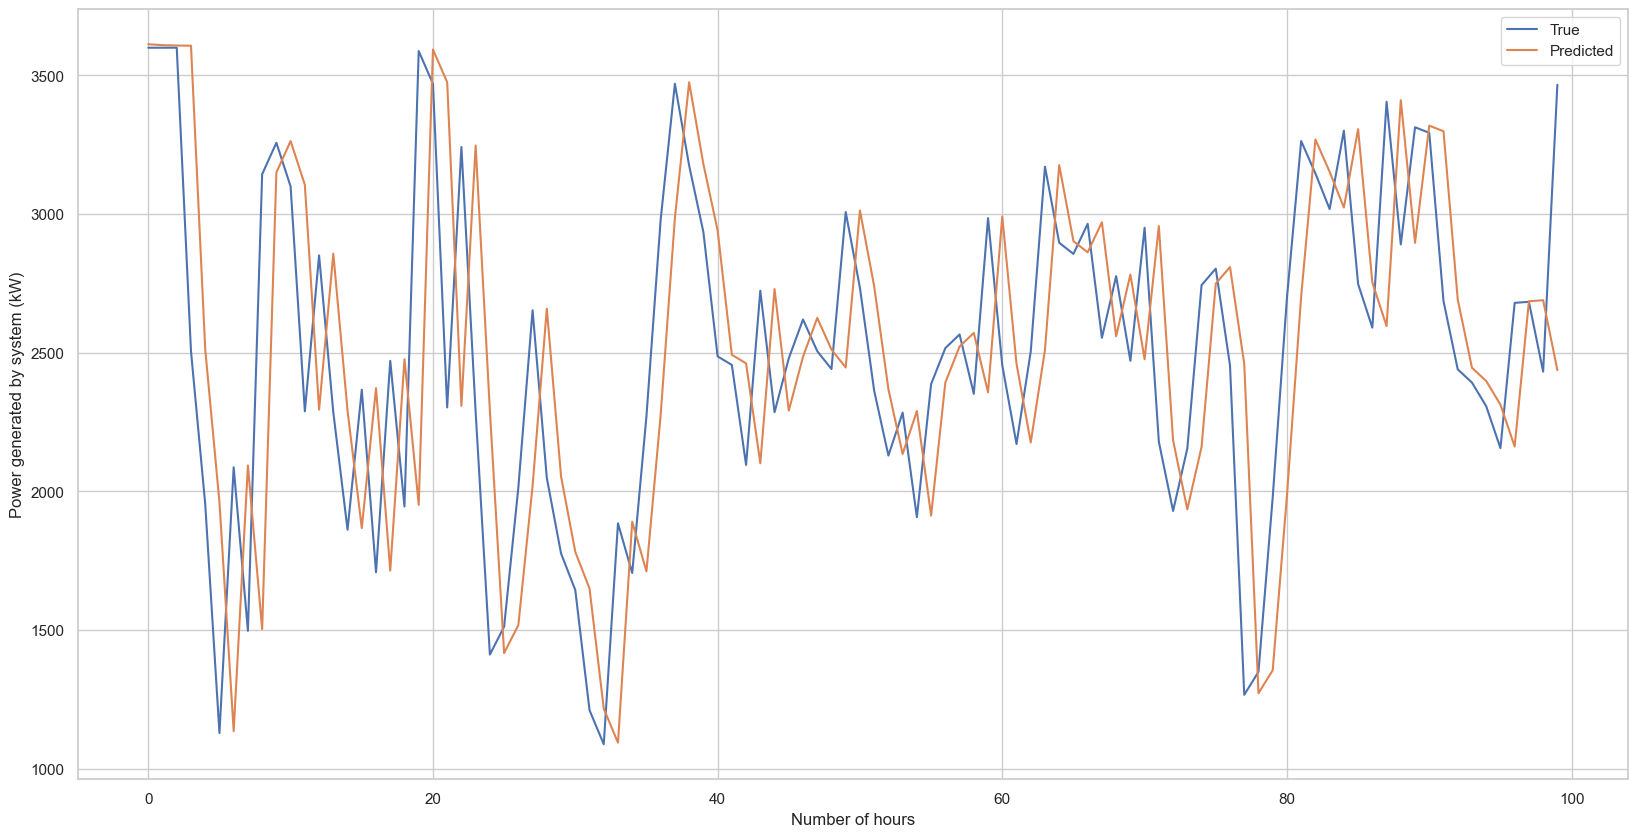

In [45]:
sns.set_style("whitegrid")
pyplot.figure(figsize=(20,10))
pyplot.plot(expectations_plot[0:100], label="True")
pyplot.plot(predictions_plot[0:100], label="Predicted")
pyplot.legend(loc='upper right')
pyplot.xlabel("Number of hours")
pyplot.ylabel("Power generated by system (kW)")
pyplot.show()

In [47]:
lstm_model.save('wind_energy_forcast.h5')

In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [36]:
lag_exp = 24

In [37]:
model = load_model('wind_energy_forcast.h5')

In [38]:
new_data = pd.DataFrame({
    'Date/Time': '2022-01-01 01:00:00',  # Replace with your actual datetime value
    'LV ActivePower (kW)': 400.0,  # Replace with your actual power value
    'Wind Speed (m/s)': 5.5  # Replace with your actual wind speed value
}, index=[0])

In [39]:
new_data = new_data.set_index('Date/Time')

In [40]:
new_data.drop(['LV ActivePower (kW)', 'Wind Speed (m/s)'], axis=1, inplace=True)

In [41]:
raw_values_new = new_data.values
diff_values_new = difference(raw_values_new, 1)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8952\2040694444.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return Series(diff)


In [42]:
supervised_new = timeseries_to_supervised(diff_values_new, lag_exp)
supervised_values_new = supervised_new.values

In [43]:
new_input_scaled = scaler.transform(supervised_values_new)

ValueError: Found array with 0 sample(s) (shape=(0, 25)) while a minimum of 1 is required by MinMaxScaler.